In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
#!pip install wordcloud

In [7]:
dataTrain = pd.read_csv('data/train.tsv',sep='\t')
dataTrain.head(20)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [9]:
dataTrain.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [10]:
dataTrain.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


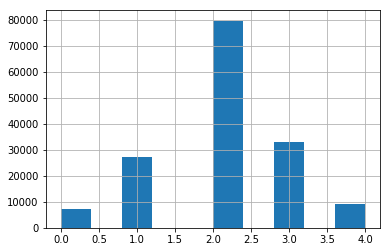

In [16]:
dataTrain.Sentiment.hist()


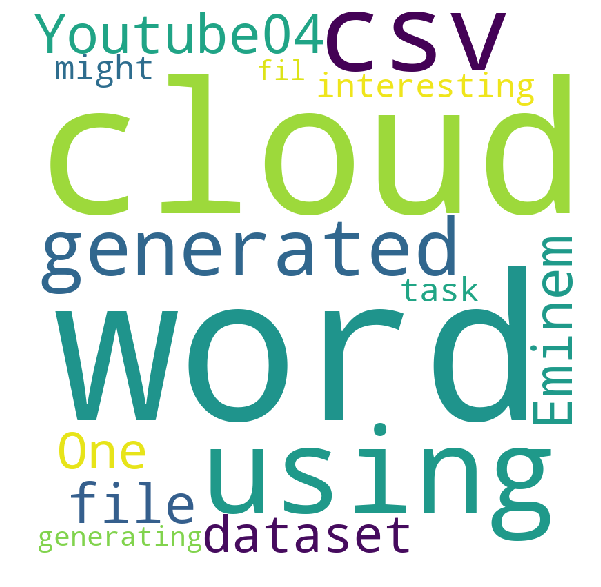

In [22]:
text = 'he above word cloud has been generated using Youtube04-Eminem.csv file in the dataset. One interesting task might be generating word clouds using other csv fil'
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

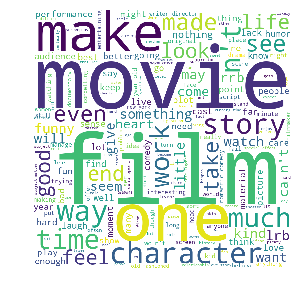

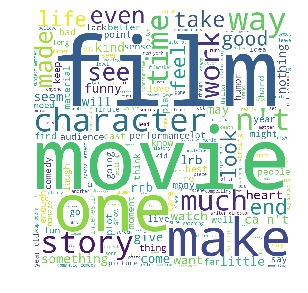

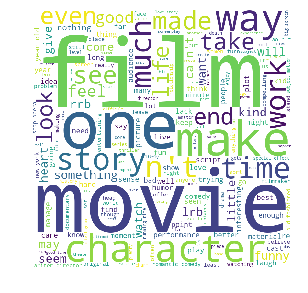

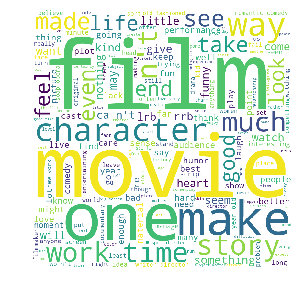

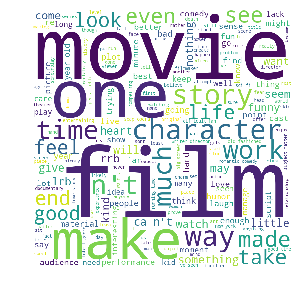

In [27]:
def plotWC(text):
    comment_words = ''
    #stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in dataTrain.Phrase:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    #stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    return wordcloud

    # plot the WordCloud image  
for i in range(5):
    wc = plotWC(dataTrain[dataTrain.Sentiment==i])
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()


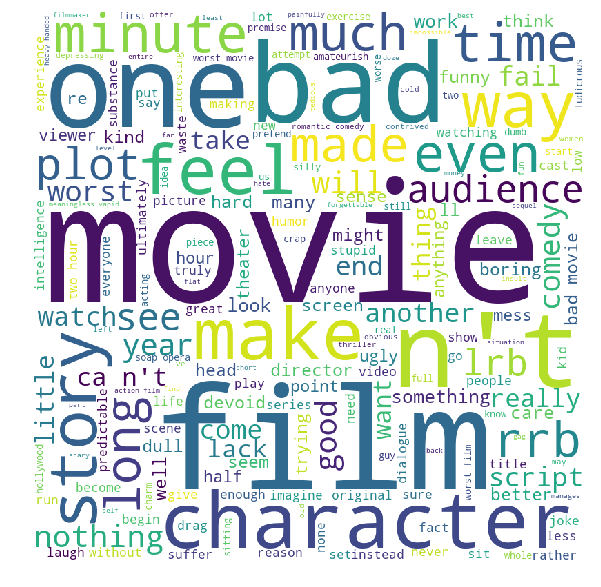

In [25]:
comment_words = ''
#stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in dataTrain[dataTrain.Sentiment==0].Phrase:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [28]:
#preprocrssing
#vectorization-- tfidf
#classify -- randomforset

In [34]:
#all_text = dataTrain[['Phrase']]

X_train, X_test, y_train, y_test = train_test_split(dataTrain['Phrase'], dataTrain['Sentiment'], test_size = 0.4, random_state = 42)
tfidf = TfidfVectorizer().set_params(stop_words = 'english')
tfidf.fit_transform(X_train)
tfidfTrain = tfidf.transform(X_train)
tfidfTest = tfidf.transform(X_test)
#y = dataTrain['Sentiment']

In [35]:
tfidfTrain

<93636x14911 sparse matrix of type '<class 'numpy.float64'>'
	with 344089 stored elements in Compressed Sparse Row format>

In [38]:
clf = RandomForestClassifier()
clf.fit(tfidfTrain,y_train)
preds = clf.predict(tfidfTest)
preds

array([2, 4, 2, ..., 3, 2, 2], dtype=int64)

In [40]:
print('The accuracy is {}'.format(accuracy_score(y_test,preds)))
print('The precision is {}'.format(precision_score(y_test,preds,average='weighted')))
print('The recall is {}'.format(recall_score(y_test,preds,average='weighted')))
print('The f1_score is {}'.format(f1_score(y_test,preds,average='weighted')))

The accuracy is 0.629645649109317
The precision is 0.617937409557022
The recall is 0.629645649109317
The f1_score is 0.621627153581182
